**Engy-5310** Computational Continuum Transport Phenomena, UMass Lowell, Chem. Eng. Nuclear Program Fall 2021; Prof. V. F. de Almeida

# Title
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\fluxc}{\boldsymbol{q}_\text{c}}
  \newcommand{\fluxf}{\boldsymbol{q}_\text{f}}
  \newcommand{\velocity}{\boldsymbol{v}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\xpoint}{\boldsymbol{x}}
  \newcommand{\Tc}{T_\text{c}}
  \newcommand{\wc}{w_\text{c}}
  \newcommand{\Tf}{T_\text{f}}
  \newcommand{\wf}{w_\text{f}}
  \newcommand{\wI}{w_\text{I}}
  \newcommand{\Ri}{R_\text{i}}
  \newcommand{\Ro}{R_\text{o}}
  \newcommand{\Omegac}{\Omega_\text{c}}
  \newcommand{\Omegaf}{\Omega_\text{f}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\div}{div}
  \DeclareMathOperator{\gradx}{grad_\xpoint}
  \DeclareMathOperator{\divx}{div_\xpoint}
  \DeclareMathOperator{\grad}{grad}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

**Student(s):**  Shubhojit Banerjee & Julián Barra <br>
**Course:** Engy-5310 Computational Continuum Transport Phenomena  <br>
**Mentor and Collaborator:** Valmor de Almeida

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**20 Dec 2021**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [Approach](#app)
 + [Weak Form of Problem Statement](#weakform)
 + [MOOSE Kernels](#kernels)
 + [Tests](#tests)
 + [Setup](#setup)
   - [Test 1](#1dsolofueldirichlet)
   - [Test 2](#1dsolofueldirichletrobin)
* [2-D Results and Analysis](#ranalysis)
* [Conclusions](#conclusions)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>

The problem we're trying to tackle in this project is that of obtaining a thermal model of the bricks used in the FIRES project, a project which is the focus of the doctoral thesis of Daniel Stack of the MIT, who is working alongside professor Stephen Lam of the University of Massachusetts-Lowell. We're doing this project as part of the research we're doing for professor Stephen Lam.

The FIRES project consists of an idea of using specially-doped aluminum oxide bricks to store energy in the form of heat. The bricks would be used both as the storage medium due to their high heat capacity and also as the heat generators themselves: in periods where there is an excess production of energy, the bricks can operate as electrical resistors. The current would be passed to the resistors and they would heat up due to the Joule effect. After that, the energy stored in the bricks can be recovered by cooling the bricks by forced convection and then using the hot air in applications where process heat is required. The heat can also be converted back into electricity by using the heat in one of many available power generation cycles, like the Rankine cycle, the Brayton cycle, etc.

It is of special importance, then, to model the thermal behavior of the bricks. Of special importance to us is to examine the possibility of thermal runway in the bricks: the bricks would be doped with certain components to give them the property of having an electrical resistivity which decreases with higher temperatures. The purpose of this is to try to make the whole system thermally self-regulating, but there is uncertainty on whether the bricks would behave as a circuit of in-series or parallel resistors. In the second case, the uneven heating of the bricks might cause a positive feedback loop in the bricks with the generation of hot points. This is also compounded by the fact that thermal conductivity also tends to decrease with higher temperatures, so the heat can't be conducted away as easily.

Sadly, to fully model the possibility of thermal runway, we would need to make both thermal conductivity and electrical resistivity dependent on temperature, which is beyond the scope of this course. As such, this project will be about a preliminary thermal model of the bricks of the FIRES project.

## [Problem Statement](#toc)<a id="problem"></a>

`mathematical statement of problem`
The problem as we're trying to solve here is a Poisson problem of the following form:

\begin{align*}
 -\bigl(-k(x)\, u'\bigr)'(x) + f(x) &= 0 \quad\quad \forall \quad\quad x\in [a,b], \\
 q_n(a) &= h\,\bigl(u(a)-u_\text{ref}\bigr)., \\
 q_n(b) &= h\,\bigl(u(b)-u_\text{ref}\bigr).
\end{align*}

In this problem, k represents the thermal diffusion, or thermal conductivity, coefficient. f(x) refers to the heat source along the bricks.

The domain of the problem is admitedly a bit difficult to define, since the bricks have a very uneven form that is difficult to model as a 1D problem. Aside from that, the bricks themselves are not fully modeled with regards to the dimensions they would take in the finished commercial product. In his *Applied Energy* paper, Stack et al. postulate a model in which the bricks have several long holes for air to flow through. The walls between all those holes would be all 5 cm thick. We will model the heat profile of the bricks along one of the walls, then. As such, the domain is defined as this:

\begin{align*}
x\in [0,0.05]
\end{align*}

At both ends of the domain, the walls would be in contact with the air, which will be made to flow to cool the bricks by forced convection. The boundary conditions at both ends of the domain, then, would be defined as a pair of Robin boundary condition, in the way we showed for the formulation of the problem above.

\begin{align*}
 q_n(a) &= h\,\bigl(u(a)-u_\text{ref}\bigr). \\
 q_n(b) &= h\,\bigl(u(b)-u_\text{ref}\bigr).
\end{align*}

The reference temperature (represented above by $u_\text{ref}$) would be the ambient temperature of air. For a problem with the same temperature at both ends, we would have a temperature of 20 degrees celsius cooling the wall of the bricks at both ends.

\begin{align*}
 T_{ref} &= 20\; [°C] \\
\end{align*}

We want, however, to introduce some level of asymmetry to the problem since the main reason why there coud be thermal runway in the system is due to the bricks heating up unevenly. While we've already said that the modeling of the thermal runway will not be done here on the project, we can still introduce a very preliminary form of this by using RobinBC, but with the reference temperatures being different at both ends of the domain. We choose to do this with a 20 degrees difference in the temperatures:

\begin{align*}
 T_{ref,a} &= 20\; [°C] \\
 T_{ref,b} &= 40\; [°C] \\
\end{align*}

The heat transfer coefficient will depend on the speed of the air being channeled through the bricks. However, even when the bricks are used to store energy instead of returning (that is, with the air being stagnant), the heat transfer coefficient will take on a positive value. Stack himself uses the following value for the coefficient with stagnant air in his *Applied Energy* paper:

\begin{align*}
 h &= 10\; \left [ \frac{W}{m^{2}K} \right ] \\
\end{align*}

What we have to define now are the functions for the thermal conductivity and the source. For the thermal conductivity, we used values found in Shackleford's *CRC Materials Science and Engineering Handbook*, plotted them in Excel and found a fitting polynomial function for the values of temperature. We obtained the following function:

\begin{align*}
 k(T) &= (2,49E-5)\cdot T^{2}-0,05875 \cdot T +40,85\; \left [ \frac{W}{mK} \right ]  \\
\end{align*}

We might make the conductivity dependant on temperature in the future. As for now, we can't make it dependent on the temperature, so an aproximation of this will necessarilly be imperfect, since the value of the temperature is needed to know the value of the conductivity and that of the conductivity is needed for the temperature. We don't know the values of the temperature at the ends of the domain, even. A first approximation of the value of the conductivity will be of it as a linear function, with the values at the end being those that the thermal conductivity takes at the reference temperatures at the ends of the domain.

\begin{align*}
 k(T_{ref,a}) &= 25,777\; \left [ \frac{W}{mK} \right ]  \\
 k(T_{ref,b}) &= 24,903\; \left [ \frac{W}{mK} \right ]  \\
\end{align*}

The function for the conductivity dependent on the position will be of this form:

\begin{align*}
 k(x) &= 25,777-17,469 \cdot x \; \left [ \frac{W}{mK} \right ]  \\
\end{align*}

With regards to the heat source. The value of the generated heat will be given by Joule's Law. The formula is presented in the *Applied Energy* paper as follows:

\begin{align*}
F\left (x \right )=\dot{e}_{gen}=\frac{AV^{2}}{  L_{char} \rho }
\end{align*}

We need, however, a value for the density of the generated heat, which will be obtained by taking the formula presented above and dividing it by a unit of volume, which in this case would be a product of the transversal area and the characteristic length that Stack postulated in his paper. The formula, then, is as follows:

\begin{align*}
f\left (x \right ) = \frac{V^{2}}{  L_{char}^{2} \rho }
\end{align*}

The characteristic length being defined in the same paper as with a value of 5 cm:

\begin{align*}
L_{char} = 0,05 \left [ \frac{W}{mK} \right ]
\end{align*}

The value of rho (electrical resistivity) in the formula is approximated in the same way as we did for that of thermal conductivity. We first oftain the following temperature-dependent formula:

\begin{align*}
\rho (T) &= (4,66E7)\cdot T^{2}-(9,86E10) \cdot T +(5,04E13)\; \left [ \Omega m \right ]  \\
\end{align*}

And one can evaluate the heat generating function with the . There is still the question of which value we should use for the voltage difference, however, and this is something we have absolutely no info on. Daniel Stack doesn't specify a value for the voltage either in his thesis or in the *Applied Energy* paper, and we have no antecedents of the voltage values to be used in this particular application. The value of the voltage being easily changeable, however, we can just introduce values to get some results for the sake of the project, and to have some interesting results to show. For this project, then, the value of the voltage difference in the resistor bricks will be the following:

\begin{align*}
V = 100 \left [ MV \right ]
\end{align*}

And for this, the value of the source at the ends of the domain is as follows:

\begin{align*}
 f_{s}(T_{ref,a}) &= 156940\; \left [ \frac{W}{m^{3}} \right ]  \\
 f_{s}(T_{ref,b}) &= 166117\; \left [ \frac{W}{m^{3}} \right ]  \\
\end{align*}

This again we can approximate as a linear position-dependent function, and we obtain:

\begin{align*}
f(x) &= 156940+185543 \cdot x \; \left [ \frac{W}{m^{3}} \right ]  \\
\end{align*}

With this, we have everything we need to start programming.

### Domain
`describe domain`

In [1]:
'''Domain'''


'Domain'

## [Objectives](#toc)<a id="obj"></a>

`state objectives`

## [Approach](#toc)<a id="app"></a>

A Galerkin weak formulation follows below and the implementation of the integrands as MOOSE kernels are described next.

### [Weak Form of Problem Statement](#toc)<a id="weakform"></a> 
The problem can be stated as a Galerkin problem in the following weak form:


\begin{align*}
 \int\limits_a^b D\, u'(x)\,v'(x)\,dx - \int\limits_a^b S\,v(x)\,dx -h\,\bigl(u(b) - u_{\infty,b}\bigr)\,v(b) -h\,\bigl(u(a) - u_{\infty,a}\bigr)\,v(a) &= 0 \quad\quad \forall \quad\quad v \in H^1_0\!\bigl([a,b]\bigr), 
\end{align*}

which can also be written as follows:

\begin{align*}
\bigl(D\, u',v'\bigr) - \bigl(S,v\bigr) &= 0 \quad\quad \forall \quad\quad v \in H^1_0\!\bigl([a,b]\bigr), 
\end{align*}

We only have one domain: that of the position along the thickness of the brick wall. The weak form on this domain will then be to find T , so that.. 

### [MOOSE Kernels](#toc)<a id="kernels"></a>


### [Tests](#toc)<a id="tests"></a>


### [Setup](#toc)<a id="setup"></a>

In [1]:
'''Domain'''
import numpy as np
import pyhit
import moosetree
x_a = 0
x_b = 0.05

x_length = x_b - x_a

In [2]:
'''Parameters'''
diff_coeff = 31
#source_s = 22028049
source_s = 97902.44

u_a = 20
u_b = 40

In [3]:
'''Data (boundary conditions for testing purposes)'''
n_felem = 6

order = 'second'
flux_order = 'first'
n_plot_pts = n_felem + 1
n_plot_pts = 2000

In [31]:
'''FEM Solution'''

def write_input_file():
    import pyhit
    import moosetree
    root = pyhit.load('')

    prblm = root.insert(-1,'Problem')
    prblm['type'] = 'FEProblem'
    prblm['coord_type'] = 'XYZ'

    mesh = root.insert(-1,'Mesh')
    
    omega = mesh.insert(-1,'omega')
    omega['type'] = 'GeneratedMeshGenerator'
    omega['dim'] = 1
    omega['xmin'] = x_a
    omega['xmax'] = x_b
    omega['nx'] = n_felem
    if order == 'second':
        omega['elem_type'] = 'edge3'

    vars = root.insert(-1,'Variables')
    
    conc = vars.insert(-1,'u')
    conc['order'] = order
    conc['family'] = 'lagrange'
    conc['initial_condition'] = (u_a+u_b)/2
    
    kernels = root.insert(-1,'Kernels')
    
    diff = kernels.insert(-1,'diffusion-term')
    diff['type'] = 'DiffusionTerm'
    diff['variable'] = 'u'
    #diff['alfa'] =174686
    #diff['beta'] =25777
    diff['diffCoeff']=31
    
    source = kernels.insert(-1,'source-term')
    source['type'] = 'SourceTerm'
    source['variable'] = 'u'
    source['sourceSFunc'] = 'sourceSFunc'
    
    functions = root.insert(-1,'Functions')
    
    source_s_func = functions.insert(-1,'sourceSFunc')
    source_s_func['type'] = 'ParsedFunction'
    source_s_func['value'] = "'a*x + b'"
    source_s_func['vars'] = "'a, b'"
    source_s_func['vals'] = "'185543, 156940'"
    
    
    aux_vars = root.insert(-1,'AuxVariables')
    
    heat_flux_fuel = aux_vars.insert(-1,'diffFluxU')
    heat_flux_fuel['order'] = flux_order
    heat_flux_fuel['family'] = 'monomial_vec'
    
    heat_flux_fuel_r = aux_vars.insert(-1,'diffFluxU_r')
    heat_flux_fuel_r['order'] = flux_order
    heat_flux_fuel_r['family'] = 'monomial'
    
    aux_kernels = root.insert(-1,'AuxKernels')
            
    heat_flux = aux_kernels.insert(-1,'heat-flux-fuel')
    heat_flux['type'] = 'HeatFlux'
    heat_flux['field'] = 'u'
    heat_flux['thCondCoeff'] = diff_coeff
    heat_flux['variable'] = 'diffFluxU'
    heat_flux['execute_on'] = 'timestep_end'
    
    heat_flux_r = aux_kernels.insert(-1,'heat-flux-fuel-r')
    heat_flux_r['type'] = 'VectorVariableComponentAux'
    heat_flux_r['vector_variable'] = 'diffFluxU'
    heat_flux_r['component'] = 'x'
    heat_flux_r['variable'] = 'diffFluxU_r'
    heat_flux_r['execute_on'] = 'timestep_end'
    
    
    bcs = root.insert(-1,'BCs')
    
    
    xa = bcs.insert(-1,'entry-u')
    xa['type'] = 'NormalHeatFluxBC'
    xa['variable'] = 'u'
    xa['boundary'] = 'left'
    xa['transferCoeff'] = -10
    xa['refTemp'] = 20
    
    xb = bcs.insert(-1,'exit-u')
    xb['type'] = 'NormalHeatFluxBC'
    xb['variable'] = 'u'
    xb['boundary'] = 'right'
    xb['transferCoeff'] = -10
    xb['refTemp'] = 40
    
    """
    xa = bcs.insert(-1,'entry-u')
    xa['type'] = 'DirichletBC'
    xa['variable'] = 'u'
    xa['boundary'] = 'left'
    xa['value'] = u_a
    #xa['transferCoeff'] = -10
    #xa['refTemp'] = 25
    
    xb = bcs.insert(-1,'exit-u')
    xb['type'] = 'DirichletBC'
    xb['variable'] = 'u'
    xb['boundary'] = 'right'
    xb['value'] = u_b
    #xb['transferCoeff'] = -10
    #xb['refTemp'] = 15
    """


    exe = root.insert(-1,'Executioner')
    exe['type'] = 'Steady'
    exe['solve_type']  = 'PJFNK'
    exe['petsc_options_iname']  = '-pc_type -pc_hypre_type'
    exe['petsc_options_value']  = 'hypre boomeramg'
    exe['l_max_its']  = 20
    exe['l_tol']  = 1e-5
    exe['nl_max_its']  = 15
    exe['nl_rel_tol']  = 1e-8
    exe['nl_abs_tol']  = 1e-8

    vp = root.insert(-1,'VectorPostprocessors')
    omega = vp.insert(-1,'Both_Robin')
    omega['type'] = 'LineValueSampler'
    omega['execute_on'] = 'timestep_end final'
    omega['variable'] = 'u diffFluxU_r'
    #omega['variable'] = 'u'  
    omega['start_point'] = str(x_a)+' 0 0'
    omega['end_point'] = str(x_b)+' 0 0'
    omega['num_points'] = n_plot_pts
    omega['sort_by'] = 'id'

    out = root.insert(-1,'Outputs')
    out['console'] = 'true'
    csv = out.insert(-1,'csv')
    csv['type'] = 'CSV'
    csv['file_base'] = 'output'
    csv['execute_on'] = 'final'

    pyhit.write('input.hit', root)


def plot_solution(df, 
                  title='No Title', 
                  basis_functions_type='No basis functions type',
                  flux_basis_functions_type='No basis functions type'):
    
    import matplotlib.pyplot as plt
    #%matplotlib inline
    plt.style.use('dark_background')

    (fig, ax1) = plt.subplots(1, figsize=(14, 5))

    ax1.plot(df['x'], df['u'],'r*-',label=basis_functions_type)

    ax1.set_xlabel(r'$x$ [m]', fontsize=18)
    ax1.set_ylabel(r'$u_h(x)$ [C]', fontsize=18, color='red')
    ax1.tick_params(axis='y', labelcolor='red', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='center left', fontsize=12)
    #ax1.set_ylim(0,1)
    ax1.grid(True)

    if 'diffFluxU_r' in df.columns:
        # create a twin x axis to be shared
        ax2 = ax1.twinx()

        ax2.plot(df['x'], df['diffFluxU_r'],'*-', color='yellow', label=flux_basis_functions_type)

        ax2.set_ylabel(r"$q_h(x)$ [g/cm$^2$-s]", fontsize=16, color='yellow')
        ax2.tick_params(axis='y', labelcolor='yellow', labelsize=14)
        ax2.legend(loc='center right', fontsize=12)
        #ax2.set_ylim(0,2)
        #ax2.grid(True)

    plt.title(title, fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')
    


In [32]:
write_input_file()

In [33]:
!cat input.hit

[Problem]
  type = FEProblem
  coord_type = XYZ
[]
[Mesh]
  [omega]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0
    xmax = 0.05
    nx = 6
    elem_type = edge3
  []
[]
[Variables]
  [u]
    order = second
    family = lagrange
    initial_condition = 30.0
  []
[]
[Kernels]
  [diffusion-term]
    type = DiffusionTerm
    variable = u
    diffCoeff = 31
  []
  [source-term]
    type = SourceTerm
    variable = u
    sourceSFunc = sourceSFunc
  []
[]
[Functions]
  [sourceSFunc]
    type = ParsedFunction
    value = 'a*x + b'
    vars = 'a, b'
    vals = '185543, 156940'
  []
[]
[AuxVariables]
  [diffFluxU]
    order = first
    family = monomial_vec
  []
  [diffFluxU_r]
    order = first
    family = monomial
  []
[]
[AuxKernels]
  [heat-flux-fuel]
    type = HeatFlux
    field = u
    thCondCoeff = 31
    variable = diffFluxU
    execute_on = timestep_end
  []
  [heat-flux-fuel-r]
    type = VectorVariableComponentAux
    vector_variable = diffFluxU
    component = x
    

In [34]:
!/Users/joker/softwears/moose/engy5310p1/engy5310p1-opt -i input.hit
!./fires_brick-opt -i input.hit

/bin/bash: line 1: /Users/joker/softwears/moose/engy5310p1/engy5310p1-opt: No such file or directory

Framework Information:
MOOSE Version:           git commit 38d37b938c on 2021-10-22
LibMesh Version:         aebb5a5c0e1f6d8cf523a720e19f70a6d17c0236
PETSc Version:           3.16.0
SLEPc Version:           3.16.0
Current Time:            Sun Dec 19 18:53:13 2021
Executable Timestamp:    Sun Dec 19 18:31:18 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   13
  Elems:                   6
  Num Subdomains:          1

Nonlinear System:
  Num DOFs:                13
  Num Local DOFs:          13
  Variables:               "u" 
  Finite Element Types:    "LAGRANGE" 
  Approximation Orders:    "SECOND" 

Auxiliary System:
  Num DOFs:                24
  Num Local DOFs:          24
  Variables:               "diffFluxU" "diffFluxU_r" 


      diffFluxU_r        id           u         x  y  z
0    -4139.428881  0.000000  433.835514  0.000000  0  0
1    -4135.484081  0.000025  433.838852  0.000025  0  0
2    -4131.539281  0.000050  433.842187  0.000050  0  0
3    -4127.594481  0.000075  433.845519  0.000075  0  0
4    -4123.649682  0.000100  433.848848  0.000100  0  0
...           ...       ...         ...       ... .. ..
1995  3922.947187  0.049900  434.070049  0.049900  0  0
1996  3927.085358  0.049925  434.066882  0.049925  0  0
1997  3931.223528  0.049950  434.063712  0.049950  0  0
1998  3935.361699  0.049975  434.060538  0.049975  0  0
1999  3939.499869  0.050000  434.057361  0.050000  0  0

[2000 rows x 6 columns]


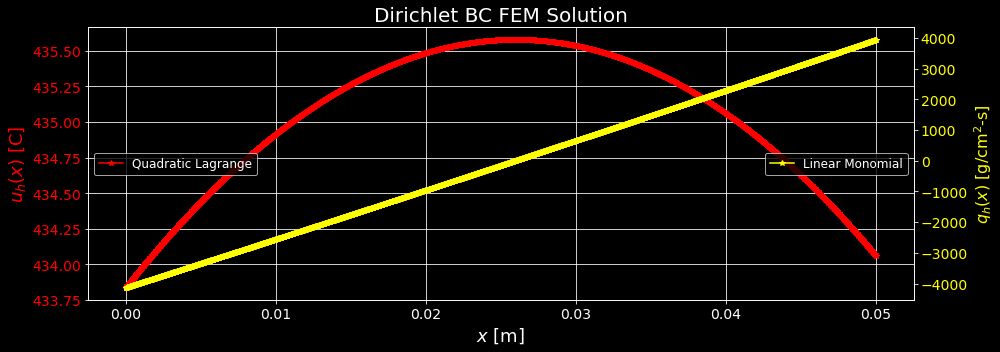

In [26]:
import pandas as pd
df = pd.read_csv('output_Both_Robin_0002.csv')
print(df)   
plot_solution(df, title='Dirichlet BC FEM Solution', basis_functions_type='Quadratic Lagrange', flux_basis_functions_type='Linear Monomial')

#### [Test 1](#toc)<a id="1dsolofueldirichlet"></a>


In [10]:
'''Input file'''

'Input file'

In [11]:
'''Run MOOSE App'''

'Run MOOSE App'

In [12]:
'''Solution'''

'Solution'

#### [Test 2](#toc)<a id="1dsolofueldirichletrobin"></a>

In [13]:
'''Parameters'''

'Parameters'

In [14]:
'''Input file mod'''

'Input file mod'

In [15]:
'''Run MOOSE App'''

'Run MOOSE App'

In [16]:
'''Solution'''

'Solution'

## [2-D Results and Analysis](#toc)<a id="ranalysis"></a>

In [17]:
'''Parameters'''

'Parameters'

In [18]:
'''FEM Parameters'''

'FEM Parameters'

In [19]:
'''Input file mod'''

'Input file mod'

In [20]:
'''Run MOOSE App'''

'Run MOOSE App'

In [21]:
'''Show 2D solution'''

'Show 2D solution'

## [Conclusions](#toc)<a id="conclusions"></a>

## [References](#toc)<a id="refs"></a>

- [1] V. F. de Almeida, [*Engy-5310: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5310), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [2] Multiphysics Object-Oriented Simulation Environment [(MOOSE)](https://mooseframework.org)
- [4] author, [reference]()